In [1]:
import tsyganenko as tsyg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacepy import coordinates as coord
import spacepy.time as spt
from spacepy.time import Ticktock
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
import sys
earth_radius_ax = 1.5*6371 #km
#adding the year data here so I don't have to crush my github repo
pathname = '../../data-se3-path-planner/yearData/cuspCrossings2019/'
# pathname = '../../data-se3-path-planner/yearData/batch2019/'
pathname = '../../batch2019/'
pathname = '../../data-se3-path-planner/yearData/batch2019/'
sys.path.append(pathname)

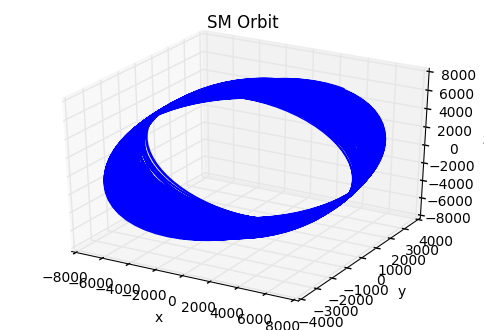

In [2]:
df = pd.read_csv(pathname+'Jan85_results.csv')
# df = pd.read_csv(pathname+'65_year.csv')
# df = pd.read_csv(pathname+'Jan65.csv')
#df = pd.read_csv(pathname+'Jan80.csv')
# df = pd.read_csv(pathname+'Jul65.csv')
# df = pd.read_csv(pathname+'Jul90.csv')
GMAT_MJD_OFFSET = 29999.5
t = df['DefaultSC.A1ModJulian'] + GMAT_MJD_OFFSET
x = df['DefaultSC.gse.X']
y = df['DefaultSC.gse.Y']
z = df['DefaultSC.gse.Z']

spacecraft = coord.Coords([[i,j,k] for i,j,k in zip(x,y,z)], 'GSE', 'car')
spacecraft.ticks = Ticktock(t,'MJD')
spacecraft = spacecraft.convert('SM','car')
points = 10000
# this figure validates what I already expected
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(spacecraft.x[:points],spacecraft.y[:points],spacecraft.z[:points])
plt.title('SM Orbit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# okay i've looked at a couple of orbits from the GSE point of view and
# i now think that it's okay for a zero inclined orbit WRT to the earth
# equator to be inclined WRT to the ecliptic, but like holy moley
# these orbits are confusing sometimes.


r euqals to [ 1.07232191  1.07392287  1.07641581 ...,  1.06428417  1.061533    1.06116979]
psi is [-0.35086542 -0.35019092 -0.34913625 ...,  0.12188005  0.12303006
  0.12319252]
type(phi_c) False
the quantity is a vector
vector
x equals to [ 1.  1.  1. ...,  1.  1.  1.]
y equals to [ 28.56048053  28.46875221  28.32591698 ...,  29.02100863  29.17863909
  29.19944942]
sum of the y vector 2237479.59098
z equals to [ 0.  0.  0. ...,  0.  0.  0.]


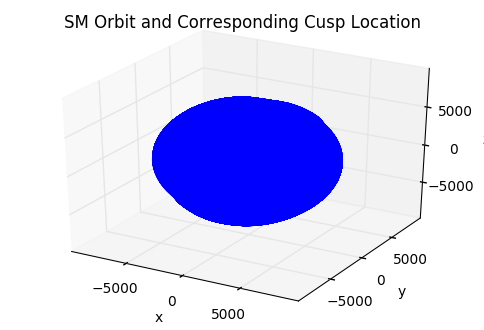

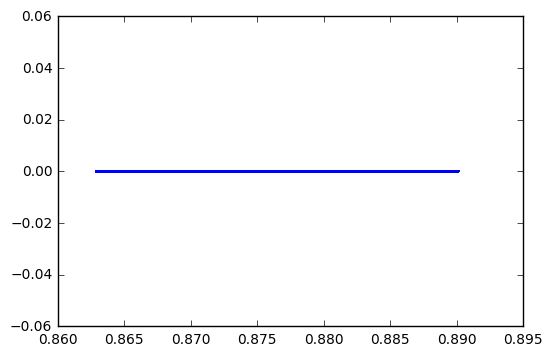

In [3]:
# goal, plot PHI on the same plot
xc,yc,zc = tsyg.orbitalCuspLocation(spacecraft,t)
cusp_location = coord.Coords([[i,j,k] for i,j,k in zip(xc,yc,zc)], 'SM', 'sph')
cusp_location.ticks = Ticktock(t,'MJD')
# cusp_location = cusp_location.convert('SM','car')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
# if I just want to :points
# ax.plot(spacecraft.x[:points],spacecraft.y[:points],spacecraft.z[:points])
# ax.plot(cusp_location.x[:points], cusp_location.y[:points],cusp_location.z[:points])

cusp_location_car = cusp_location.convert('SM', 'car')
# if I want EVERYTHING
# ax.plot(spacecraft.x,spacecraft.y, spacecraft.z)
# ax.scatter(cusp_location.x, cusp_location.y,cusp_location.z)
ax.plot(spacecraft.x, spacecraft.y, spacecraft.z)
ax.scatter(cusp_location_car.x, cusp_location_car.y, cusp_location_car.z)
plt.title('SM Orbit and Corresponding Cusp Location')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-earth_radius_ax, earth_radius_ax)
ax.set_ylim3d(-earth_radius_ax, earth_radius_ax)
ax.set_zlim3d(-earth_radius_ax, earth_radius_ax)
plt.show()
plt.plot(cusp_location_car.x,cusp_location_car.y)
plt.show()

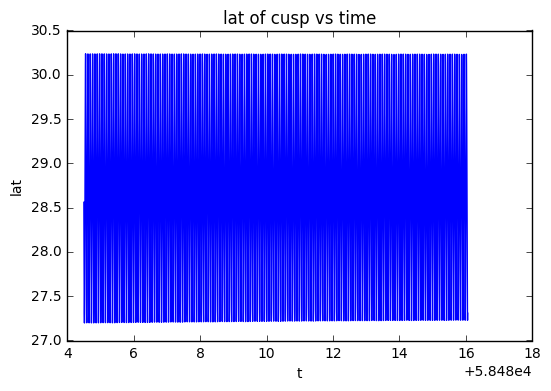

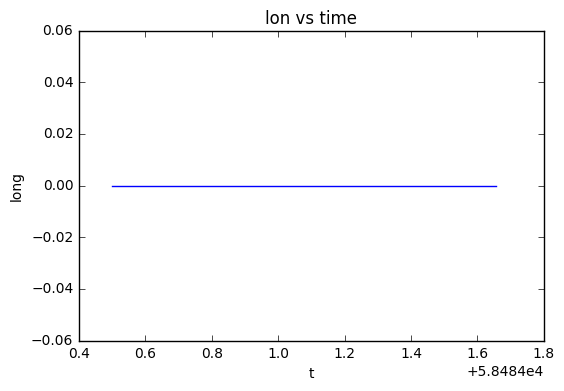

In [4]:
# plt.plot(spacecraft.x,spacecraft.z)
# generate plots of the cusp location vs. time
plt.plot(cusp_location.ticks.MJD[:10000], cusp_location.lati[:10000])

#plt.scatter(cusp_location.x[:points],cusp_location.y[:points])
# plt.xlim([-0.5*earth_radius_ax, earth_radius_ax])
# plt.ylim([-0.5*earth_radius_ax, earth_radius_ax])
plt.xlabel('t')
plt.ylabel('lat')
plt.title('lat of cusp vs time')
plt.show()

plt.plot(cusp_location.ticks.MJD[:1000], cusp_location.long[:1000])
plt.xlabel('t')
plt.ylabel('long')
plt.title('lon vs time')
plt.show()


In [5]:
# the working configuration is 'SM'
# changed from 'GSE' to
spacecraft_sph = spacecraft.convert('SM','sph')
cusp_location_sph = cusp_location.convert('SM','sph')

# which it is smart enough to figure out

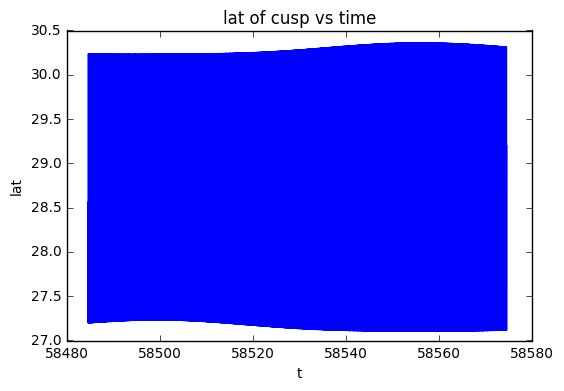

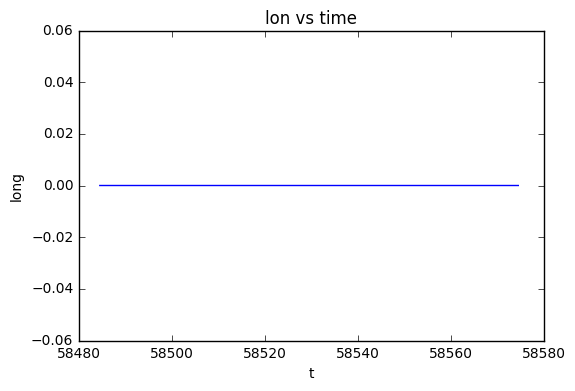

In [6]:
# look at the same plots of t vs lat/lon and now look at the GSE and GSM versions
# first GSM
plt.plot(cusp_location_sph.ticks.MJD, cusp_location_sph.lati)

#plt.scatter(cusp_location.x[:points],cusp_location.y[:points])
# plt.xlim([-0.5*earth_radius_ax, earth_radius_ax])
# plt.ylim([-0.5*earth_radius_ax, earth_radius_ax])
plt.xlabel('t')
plt.ylabel('lat')
plt.title('lat of cusp vs time')
plt.show()

plt.plot(cusp_location_sph.ticks.MJD, cusp_location_sph.long)
plt.xlabel('t')
plt.ylabel('long')
plt.title('lon vs time')
plt.show()

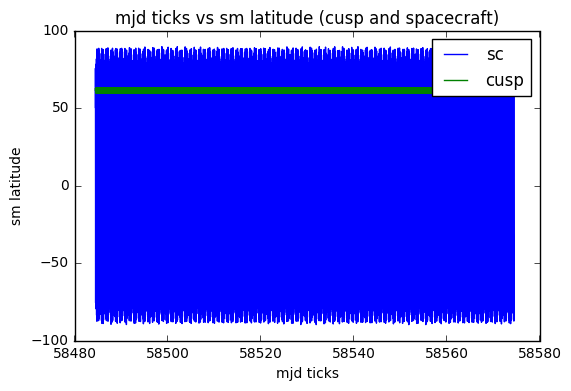

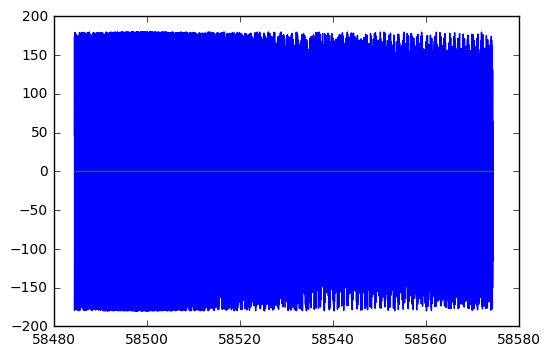

In [7]:
# making the plots
points = len(spacecraft_sph.ticks.MJD)
lowBound = 0# 156000
highBound = points# 166000
plt.plot(spacecraft_sph.ticks.MJD[lowBound:highBound],spacecraft_sph.lati[lowBound:highBound],label='sc')
# i was doing 90 - cusp location?
plt.plot(cusp_location_sph.ticks.MJD[lowBound:highBound],90-cusp_location_sph.lati[lowBound:highBound],label='cusp')
plt.legend()
plt.xlabel('mjd ticks')
plt.ylabel('sm latitude')
plt.title('mjd ticks vs sm latitude (cusp and spacecraft)')
plt.show()


plt.plot(spacecraft_sph.ticks.MJD[lowBound:highBound], spacecraft_sph.long[lowBound:highBound],label='sc')
plt.plot(cusp_location_sph.ticks.MJD[lowBound:highBound],cusp_location_sph.long[lowBound:highBound],label='cusp')
plt.show()
lat = cusp_location_sph.lati
# modlat = 90 - cusp_location_sph.lati 
# print("modlat",modlat)

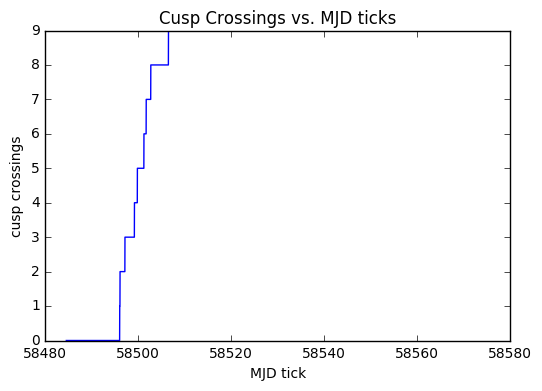

final crossings count =  9
mean sm lat of cusp 28.7305733452
mean sm lon of cusp 0.0


In [8]:
# count it up
count = []
c = 0
for satlat,cusplat, satlon,cusplon in zip(spacecraft_sph.lati, lat, spacecraft_sph.long, cusp_location_sph.long):
    # 0<=cusplon<180
    if abs(satlat - cusplat)<=2 and abs(satlon-cusplon)<=1:
        # right now i'm using +/- 2 deg for the latitude,
        # and +/- 2 deg for the longitude
        c+=1
        count.append(c)
    else:
        count.append(c)
        
plt.plot(spacecraft_sph.ticks.MJD, count)
plt.xlabel('MJD tick')
plt.ylabel('cusp crossings')
plt.title('Cusp Crossings vs. MJD ticks')
#plt.xlim([58700, 58800])
plt.show()
print("final crossings count = ",c)

# mean latitude of the cusp 
print("mean sm lat of cusp",sum(cusp_location_sph.lati)/len(cusp_location_sph.lati))
print("mean sm lon of cusp", sum(cusp_location_sph.long)/len(cusp_location_sph.long))

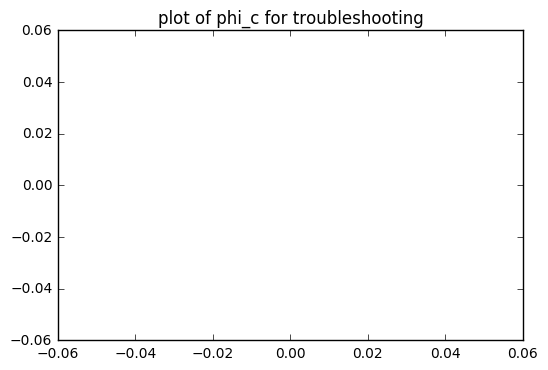

UTC date [datetime.datetime(2019, 1, 1, 12, 0, 5, 34372)
 datetime.datetime(2019, 1, 1, 12, 1, 5, 34369)
 datetime.datetime(2019, 1, 1, 12, 2, 39, 905912) ...,
 datetime.datetime(2019, 4, 1, 11, 58, 12, 413941)
 datetime.datetime(2019, 4, 1, 11, 59, 51, 732211)
 datetime.datetime(2019, 4, 1, 12, 0, 5, 34372)]


In [9]:
# lets' see if we can check the psi function before 1pm

# just a little note to myself, THIS IS A PLOT OF PHI
# the above is a plot of LAT so LAT is a reflection of PHI
# which I think is why it's okay for this to have the mirror image.
r = 1.127
psi = tsyg.getTilt(t)
psi = np.asarray(psi)
phic = tsyg.getPhi_c(r,psi)
plt.plot(phic)
plt.title('plot of phi_c for troubleshooting')
plt.show()

# show the date in UTC
print("UTC date", spacecraft_sph.ticks.UTC)